[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/samuelgil007/Phishing-Websites-IntroduccionIA/blob/main/01%20-%20Proyecto_final_IA.ipynb)

#***PROYECTO DE ANALITICA DE DATOS***
###POR:
- SAMUEL GIL ARBOLEDA



In [ ]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import itertools
import io
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from IPython.display import clear_output
from sklearn.neighbors import KernelDensity
from tabulate import tabulate
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler


Importar DataSet: (Correr la siguiente linea) 

In [ ]:
data_to_load = data=pd.read_csv('https://raw.githubusercontent.com/samuelgil007/Phishing-Websites-IntroduccionIA/main/PhishingDB.csv')

# ANALISIS DE LOS DATOS

In [ ]:
del data["id"]
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Dimensiones del dataset:

In [ ]:
data.shape

(11055, 31)

Mas informacion del dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

Ver si hay nulos:

In [ ]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Distribución de las clases:

 1    6157
-1    4898
Name: Result, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


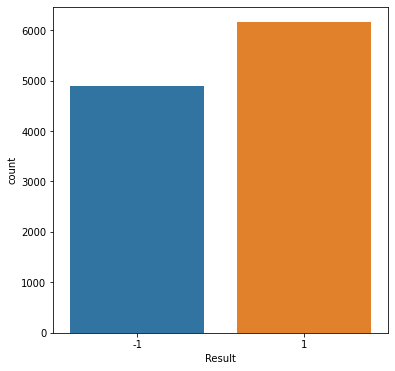

In [ ]:
print(data['Result'].value_counts())
sns.countplot(data['Result'])

Separacion de X y Y:

In [ ]:
X = data.drop('Result', axis=1).values
Y = data['Result'].values
print (X.shape , Y.shape)
#1

(11055, 30) (11055,)


Separacion de test y train: (Para probar codigos y disminuir tiempo de ejecucion)





In [ ]:
#Para pruebas con modelos complicados
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
print (X_test.shape , Y_test.shape)

(111, 30) (111,)


# DT (DECISION TREE)

In [ ]:
def experimentar_dt(depths,X, Y):
    """funcion que realiza experimentos de arboles de decision
    depths: list[int] lista con la profundidad de arboles a experimentar
    normalize bool: indica si se aplica normalización a los datos
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - profunidad de los arboles
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for depth in depths:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        Macc = []
        Mf1 = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]

            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo = DecisionTreeClassifier(max_depth=depth)
            modelo = modelo.fit(Xtrain, Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred = modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            Macc.append(accuracy_score(Ytest, Yest))
            Mf1.append(f1_score(Ytest, Yest))

        resultados.loc[idx,'profundidad del arbol'] = depth
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy'] = np.mean(Macc)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1
        
    return (resultados)

In [ ]:
resultados_dt = experimentar_dt([3,10,20,50],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy,f1_score
0,3.0,0.908227,0.001163,0.904029,0.011213,0.904029,0.915764
1,10.0,0.958591,0.001634,0.943825,0.006790,0.943825,0.949381
2,20.0,0.989326,0.000761,0.962272,0.019184,0.962272,0.966199
3,50.0,0.989889,0.000318,0.962543,0.019835,0.962543,0.966425


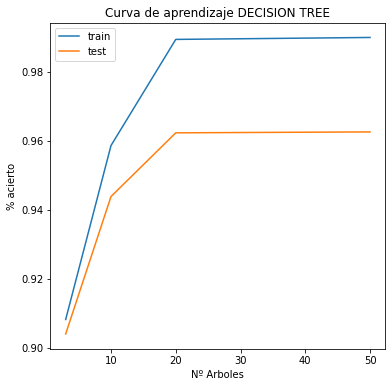

In [ ]:
plt.plot(resultados_dt['profundidad del arbol'], resultados_dt['eficiencia de entrenamiento'], label="train")
plt.plot(resultados_dt['profundidad del arbol'], resultados_dt['eficiencia de prueba'], label="test")
plt.xlabel("Nº Arboles")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje DECISION TREE')
plt.rcParams["figure.figsize"] = (6,6)

# RF (Random Forest)


In [ ]:
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                Macc.append(accuracy_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados)

Resultados Random Forest

In [ ]:
arboles = [5,10,20,50,100,150]
variables_seleccion = [5]
resultados_rf = experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 100 arboles
termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,f1_score
0,5.0,5.0,0.988090,0.000627,0.968154,0.012302,0.968154,0.971618
1,10.0,5.0,0.989236,0.000231,0.971592,0.011267,0.971592,0.974629
2,20.0,5.0,0.989648,0.000376,0.971049,0.010867,0.971049,0.974178
3,50.0,5.0,0.989879,0.000318,0.973040,0.009548,0.973040,0.975936
4,100.0,5.0,0.989889,0.000318,0.972406,0.011275,0.972406,0.975385
5,150.0,5.0,0.989889,0.000318,0.972407,0.010215,0.972407,0.975425


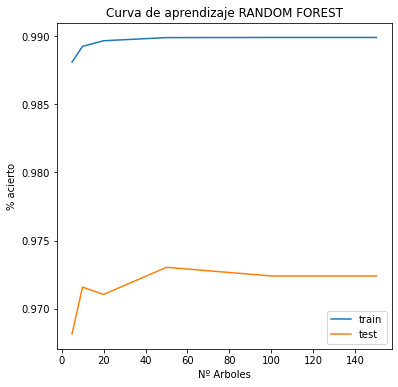

In [ ]:
plt.plot(resultados_rf['número de arboles'], resultados_rf['eficiencia de entrenamiento'], label="train")
plt.plot(resultados_rf['número de arboles'], resultados_rf['eficiencia de prueba'], label="test")
plt.xlabel("Nº Arboles")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje RANDOM FOREST')
plt.rcParams["figure.figsize"] = (6,6)

# Seleccion caracteristicas


Probando Forward y Backward con el modelo SVM, Se realiza con el metodo Sequential Backward Floating Selection:

DT (SBFS):

In [ ]:
###################################################
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [26,27,28,29]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    # el mejor depth en la primera prueba
    dt = DecisionTreeClassifier(max_depth=20)
    sbfs = SFS(dt, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=1)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                      CV score
--  --------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 26  (0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28)              0.963448
 1  Sequential Backward Floating Selection                 27  (0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)          0.962453
 2  Sequential Backward Floating Selection                 28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28)        0.962181
 3  Sequential Backward Floating Selection                 29  (0, 1, 2, 3, 4, 5, 6, 7, 8,

RANDOM FOREST (SBFS):

In [ ]:
########################Sequential Backward Floating Selection
###################################################
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
resultadosCaracteristicas = pd.DataFrame()
caracteristicas = [26,27,28,29]
indexx = 0
# Sequential Backward Floating Selection
for carac in caracteristicas:
    # mejores parametros
    rf = RandomForestClassifier(n_estimators=50, max_features=5, criterion="gini")
    sbfs = SFS(rf, 
              k_features=carac, 
              forward=False, 
              floating=True, 
              scoring='accuracy',
              cv=10,
              n_jobs=1)
    sbfs = sbfs.fit(X,Y)
    resultadosCaracteristicas.loc[indexx,'Nombre'] = "Sequential Backward Floating Selection"
    resultadosCaracteristicas.loc[indexx,'caracteristicas'] = carac
    resultadosCaracteristicas.loc[indexx,'caracteristicas elegidas'] = str(sbfs.k_feature_idx_)
    resultadosCaracteristicas.loc[indexx,'CV score'] = sbfs.k_score_
    indexx+=1
print(tabulate(resultadosCaracteristicas, headers='keys', tablefmt='asciitable'))

    Nombre                                    caracteristicas  caracteristicas elegidas                                                                                      CV score
--  --------------------------------------  -----------------  ----------------------------------------------------------------------------------------------------------  ----------
 0  Sequential Backward Floating Selection                 26  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29)               0.973221
 1  Sequential Backward Floating Selection                 27  (0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)          0.972678
 2  Sequential Backward Floating Selection                 28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)       0.973221
 3  Sequential Backward Floating Selection                 29  (0, 1, 2, 3, 4, 5, 6, 7, 8,

# PCA



PCA EN RANDOM FOREST

In [ ]:
def experimentar_rf_PCA(num_componentes, X, Y):
    folds = 10
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for num_comp in num_componentes:

          EficienciaTrain = []
          EficienciaVal = []
          Mf1 = []
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]

              pca = PCA(n_components=num_comp)
              pca.fit(Xtrain)
              Xtrain = pca.transform(Xtrain)
              Xtest = pca.transform(Xtest)
              modelo = RandomForestClassifier(n_estimators=50, criterion="gini")
              modelo.fit(Xtrain, Ytrain)
              Ytrain_pred = modelo.predict(Xtrain)
              Yest = modelo.predict(Xtest)
              EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
              EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              Mf1.append(f1_score(Ytest, Yest))

          resultados.loc[idx,'PCA componentes'] = num_comp
          resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
          resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
          resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
          resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
          resultados.loc[idx,'f1_score'] = np.mean(Mf1)
          idx= idx +1
        
    return (resultados)

Se realiza con el mejor conjunto de caracteristicas que obtuvo mejor presición:

In [ ]:
RFresultadosPCA = experimentar_rf_PCA([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29],X, Y)
RFresultadosPCA

,PCA componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,f1_score
0,1.0,0.987869,0.000312,0.831800,0.098498,0.852786
1,2.0,0.989658,0.000501,0.897939,0.059584,0.910552
2,3.0,0.989809,0.000328,0.919202,0.047399,0.928127
3,4.0,0.989738,0.000349,0.935851,0.036957,0.943209
4,5.0,0.989798,0.000340,0.947070,0.031057,0.953205
5,6.0,0.989829,0.000348,0.953405,0.025271,0.958571
6,7.0,0.989819,0.000345,0.957024,0.021661,0.961685
7,8.0,0.989819,0.000362,0.956391,0.022697,0.961089
8,9.0,0.989829,0.000314,0.957748,0.022064,0.962339
9,10.0,0.989859,0.000335,0.958291,0.021067,0.962795


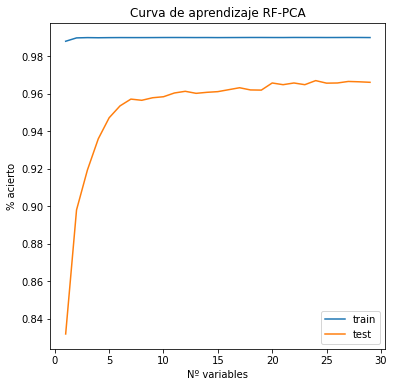

In [ ]:
plt.plot(RFresultadosPCA['PCA componentes'], RFresultadosPCA['eficiencia de entrenamiento'], label="train")
plt.plot(RFresultadosPCA['PCA componentes'], RFresultadosPCA['eficiencia de prueba'], label="test")
plt.xlabel("Nº variables")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje RF-PCA')
plt.rcParams["figure.figsize"] = (6,6)

PCA EN DT

In [ ]:
def experimentar_dt_PCA(num_componentes,depths,X, Y):
    folds = 4
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for num_comp in num_componentes:
      for depth in depths:
          Mf1 = []
          EficienciaTrain = []
          EficienciaVal = []
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]
              pca = PCA(n_components=num_comp)
              pca.fit(Xtrain)
              Xtrain = pca.transform(Xtrain)
              Xtest = pca.transform(Xtest)
              modelo = DecisionTreeClassifier(max_depth=depth)
              modelo = modelo.fit(Xtrain, Ytrain)
              Ytrain_pred = modelo.predict(Xtrain)
              Yest = modelo.predict(Xtest)
              EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
              EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              Mf1.append(f1_score(Ytest, Yest))

          resultados.loc[idx,'PCA componentes'] = num_comp
          resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
          resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
          resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
          resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
          resultados.loc[idx,'f1_score'] = np.mean(Mf1)
          idx= idx +1
        
    return (resultados)

Se realiza con el mejor hiperparametro que obtuvo mejor presición:

In [ ]:
DTresultadosPCA = experimentar_dt_PCA([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29],[20], X, Y)
DTresultadosPCA

,PCA componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,f1_score
0,1.0,0.855331,0.039347,0.689991,0.129403,0.740445
1,2.0,0.976933,0.006208,0.816633,0.108246,0.836508
2,3.0,0.981969,0.004744,0.845671,0.095369,0.861211
3,4.0,0.989205,0.000727,0.858875,0.099309,0.875227
4,5.0,0.989929,0.000685,0.887731,0.087331,0.903298
5,6.0,0.989688,0.001124,0.896054,0.080457,0.908940
6,7.0,0.989658,0.001014,0.896419,0.073406,0.907298
7,8.0,0.989658,0.001014,0.898680,0.069955,0.910145
8,9.0,0.989899,0.000833,0.901847,0.069923,0.913555
9,10.0,0.989809,0.000793,0.905466,0.064216,0.915551


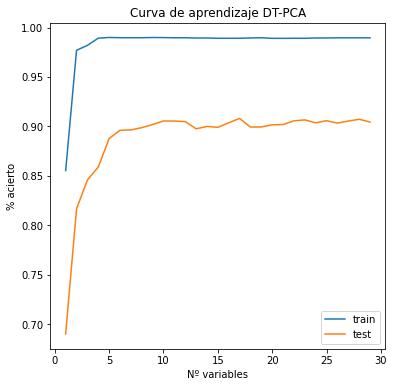

In [ ]:
plt.plot(DTresultadosPCA['PCA componentes'], DTresultadosPCA['eficiencia de entrenamiento'], label="train")
plt.plot(DTresultadosPCA['PCA componentes'], DTresultadosPCA['eficiencia de prueba'], label="test")
plt.xlabel("Nº variables")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje DT-PCA')
plt.rcParams["figure.figsize"] = (6,6)